In [1]:
import numpy as np
import scipy.stats as stats
import random

import math

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import ScalarFormatter

In [10]:
# Define Tableau 10 Colors
tableau_colors = [
    (31, 119, 180),  # Blue 0
    (255, 127, 14),  # Orange 1
    (44, 160, 44),   # Green 2
    (214, 39, 40),   # Red 3
    (148, 103, 189), # Purple 4 
    (140, 86, 75),   # Brown 5
    (227, 119, 194), # Pink 6
    (127, 127, 127), # Gray 7
    (188, 189, 34),  # Yellow 8
    (23, 190, 207),  # Cyan 9
]

# Normalize RGB values to range [0, 1]
tableau_colors = [(r / 255, g / 255, b / 255) for r, g, b in tableau_colors]

font = {'family': 'Georgia', 'color':  'black', 'weight': 'normal', 'size': 20}
title_font = {'family': 'Georgia', 'color':  'black', 'weight': 'bold', 'style': 'italic', 'size': 20}
suptitle_font = FontProperties(family='Georgia', weight='bold', size=22)
legend_font = FontProperties(family='Georgia', weight='normal', size=16)
tick_font = {'family': 'Georgia', 'size': 18}

In [4]:
D = 0.002 # thermal diffusion coefficient, cm^2/s
X = Y = 9 # size of vessel
delta_xy = 1 # cm, for either x, y
delta_t = 100 # s

In [7]:
def temp_evolution(H):
    # initialization
    alpha = 15 / (H * 3600) # slope of time step, will make this a variable 
    T = int(H * 3600 / delta_t) # total time steps
    temp_grid = np.zeros((T+1, X, Y))
    temp_maxs = np.zeros(T+1)
    temp_mins = np.zeros(T+1)
    temp_gradients = np.zeros(T+1)

    for t in range(1, T):
    #     rim
        new_bath_temp = alpha * t * delta_t
        temp_grid[t, 0, :]   = new_bath_temp
        temp_grid[t, -1, :]  = new_bath_temp
        temp_grid[t, :, 0]   = new_bath_temp
        temp_grid[t, :, -1]  = new_bath_temp
    #     central pieces
        for i in range(1, X-1):
            for j in range(1, Y-1):
                delta_total = temp_grid[t-1, i-1, j] + temp_grid[t-1, i+1, j] \
                            + temp_grid[t-1, i, j-1] + temp_grid[t-1, i, j+1] \
                            - 4 * temp_grid[t-1, i, j]
                temp_grid[t, i, j] = temp_grid[t-1, i, j] \
                                   + D / (delta_xy ** 2) * delta_total * delta_t
        temp_gradient = np.max(temp_grid[t, :, :]) - np.min(temp_grid[t, :, :])
        temp_maxs[t] = np.max(temp_grid[t, :, :])
        temp_mins[t] = np.min(temp_grid[t, :, :])
        temp_gradients[t] = temp_gradient
        
    return temp_gradients, temp_grid
    

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_4458/3277905725.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_4458/3277905725.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


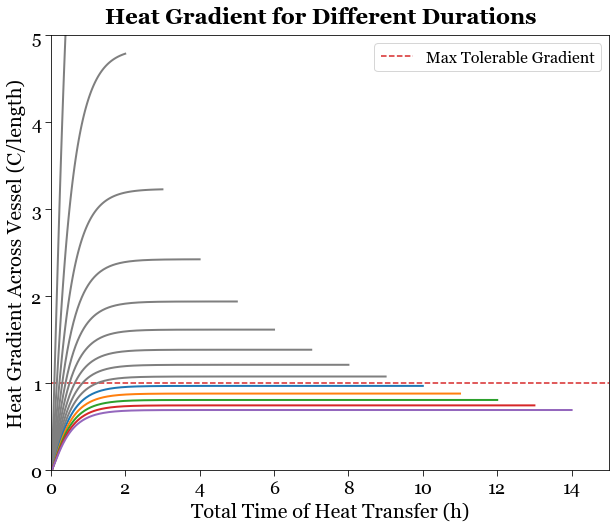

In [30]:
# plotting 
fig = plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.axhline(y=1, color=tableau_colors[3], linestyle='--', label='Max Tolerable Gradient')

for H in range(1, 15):
    temp_gradients, temp_grid = temp_evolution(H)
    ax.plot(np.array(range(1, len(temp_gradients))) / 36.0, temp_gradients[:-1], \
            color=tableau_colors[(max(0, H-9) + 7) % 8], \
            linewidth=2.0, alpha=1)
    
# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xlim(0, 15)
ax.set_ylim(0, 5)
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

# Customize the plot (optional)
plt.xlabel('Total Time of Heat Transfer (h)', fontdict=font)
plt.ylabel('Heat Gradient Across Vessel (C/length)', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Heat Gradient for Different Durations', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='upper right', prop=legend_font)

# Show the plot
plt.savefig('../plots/temp_gradients.png')
plt.show()


In [ ]:
temp_gradients, temp_grid = temp_evolution(1)
img1 = temp_grid[-2]
temp_gradients, temp_grid = temp_evolution(15)
img2 = temp_grid[-2]

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust figsize as needed

axes[0].imshow(img1, cmap='viridis', vmin=5, vmax=15)
axes[0].set_title('Heat Gradient, 1 h', fontdict=title_font)
axes[0].axis('off')  # Turn off axis labels and ticks for the first subplot
axes[1].imshow(img2, cmap='viridis', vmin=5, vmax=15)
axes[1].set_title('Heat Gradient, 15 h', fontdict=title_font)
axes[1].axis('off')  # Turn off axis labels and ticks for the second subplot

# Display the subplots
plt.gcf().set_facecolor('white')
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig('../plots/last_shots.png')
plt.show()
